<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA 모델은 시계열 데이터의 자동회귀(AR) 성분, 차분(Differencing) 성분, 이동평균(MA) 성분을 모두 고려하여 시계열 패턴을 모델링합니다..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.

In [2]:
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()

data.loc[50:150, 'value temp'] = model_fit.predict(start=50, end=2000)
print(data[50:150])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


          Date  Value  value temp
50  2023-02-20    NaN    0.118050
51  2023-02-21    NaN    0.072598
52  2023-02-22    NaN    0.159869
53  2023-02-23    NaN    0.127172
54  2023-02-24    NaN    0.142888
..         ...    ...         ...
145 2023-05-26    NaN    0.074799
146 2023-05-27    NaN    0.035281
147 2023-05-28    NaN    0.026200
148 2023-05-29    NaN    0.043857
149 2023-05-30    NaN    0.022966

[100 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


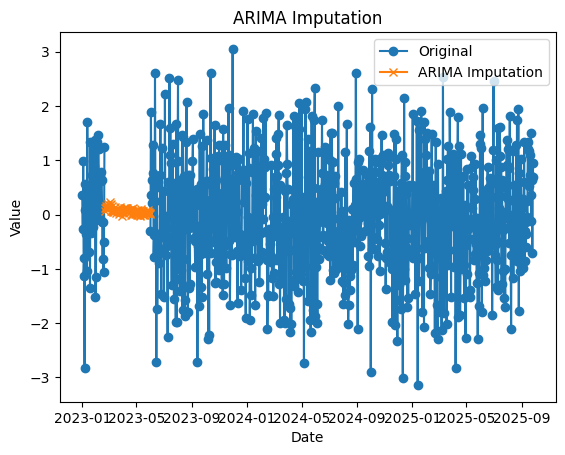

In [3]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()

## AR 모델
const : 상수항 = 절편 <br>
Value.L1 : Lag1 <br>
coef : 회귀계수 <br>
p-값이 작아야 유의 <br>
AR(1)은 자기상관 계수를 나타냄

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -138.444
Method:               Conditional MLE   S.D. of innovations              0.980
Date:                Thu, 01 Jun 2023   AIC                            282.888
Time:                        00:02:24   BIC                            290.674
Sample:                             1   HQIC                           286.038
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.099      0.310      0.757      -0.163       0.224
Value.L1       0.5897      0.081      7.259      0.000       0.430       0.749
                                    Roots           

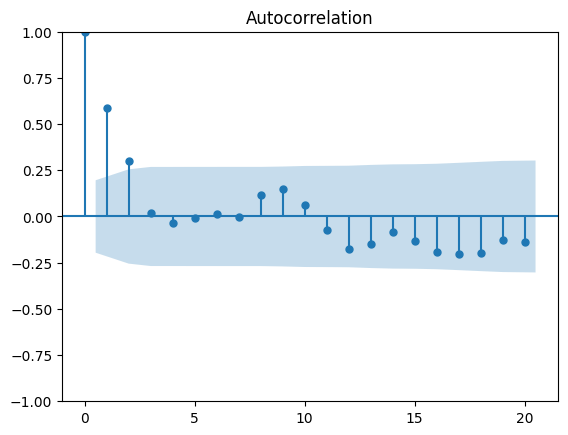

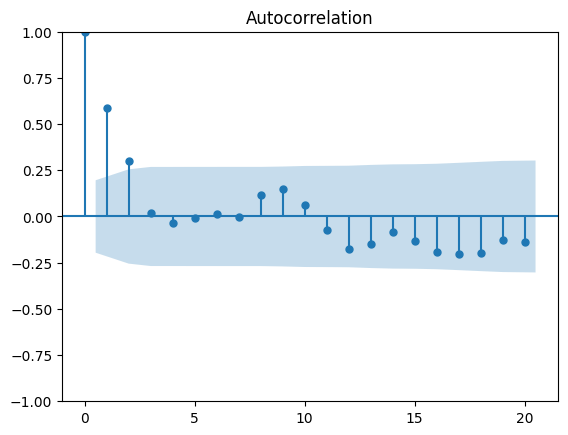

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

n = 100 # 데이터 포인트 수
ar_params = [0.7] # 자기회귀 계수
ma_params = [] # 이동평균 계수
residuals = np.random.normal(0,1,n) # 잔차 생성

#AR(1) 모델 생성
data = [0] # 초기값 설정
for i in range(1, n) :
  data.append(ar_params[0] * data[i-1] + residuals[i])

df = pd.DataFrame({
    'Date' : pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value' : data
})

# AR (1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력
print(results.summary())

# ACF 출력
plot_acf(df['Value'], lags=20)


## MA  : 이동평균 모델
MA(2) 는 모델의 차수를 나타냄 <br>
현재 시점의 데이터를 이전 2개의 잔차로 설명

In [5]:
n = 100 # 데이터 포인트 수
ma_params = [0.4, -0.2] # 이동평균 계수
residuals = np.random.normal(0,1,n) # 잔차 생성

# MA(2) 모델 생성
data = [0,0]
for i in range(2, n) :
  data.append(ma_params[0] * residuals[i-1] + ma_params[1] + residuals[i-2] + residuals[i])

df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -1.045058
3  -0.932329
4   0.387098
..       ...
95  0.623372
96 -0.181018
97  0.978622
98  1.135442
99  0.086108

[100 rows x 1 columns]


skew : 잔차의 비대칭성 <br>
kurtosis : 잔차의 첨도 (3에 가까우면 정규분포) <br>
JB : 잔차의 정규성 - 1에 가까우면 정규



                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -145.828
Date:                Thu, 01 Jun 2023   AIC                            299.656
Time:                        00:02:24   BIC                            310.076
Sample:                             0   HQIC                           303.873
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2410      0.210      1.148      0.251      -0.171       0.653
ma.L1          0.2818      0.069      4.087      0.000       0.147       0.417
ma.L2          0.7423      0.075      9.881      0.0

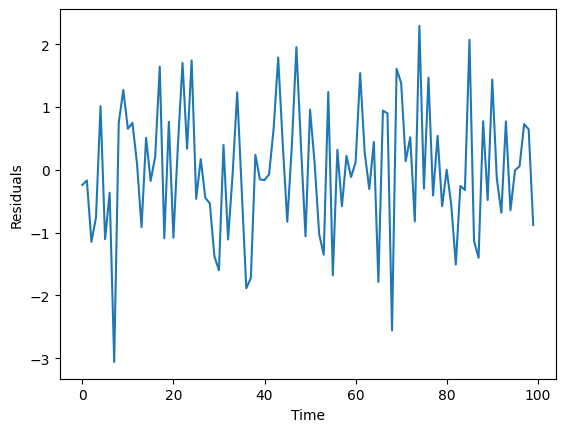

In [6]:
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

## ARMA 모델 실습
ARIMA에서 미분을 담당하는 I를 뺀 것

In [12]:
n = 100
ar_params = [0.7]
ma_params = [0.4, -0.2] # MA(2) 이므로 계수가 2개
residuals = np.random.normal(0,1,n)

data = [0,0]
for i in range(2,n) :
  ar_term = ar_params[0] * data[i-1]
  ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
  data.append(ar_term + ma_term + residuals[i])

df = pd.DataFrame({
    'Value' : data
})
print(df)
model = ARIMA(df['Value'], order=(1,0,2))
results = model.fit()

print (results.summary())

       Value
0   0.000000
1   0.000000
2  -1.124838
3  -1.107234
4   1.529021
..       ...
95 -1.058909
96  0.711473
97  0.889933
98  1.815570
99  3.135758

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.930
Date:                Thu, 01 Jun 2023   AIC                            291.860
Time:                        00:26:38   BIC                            304.886
Sample:                             0   HQIC                           297.132
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2947      0.4

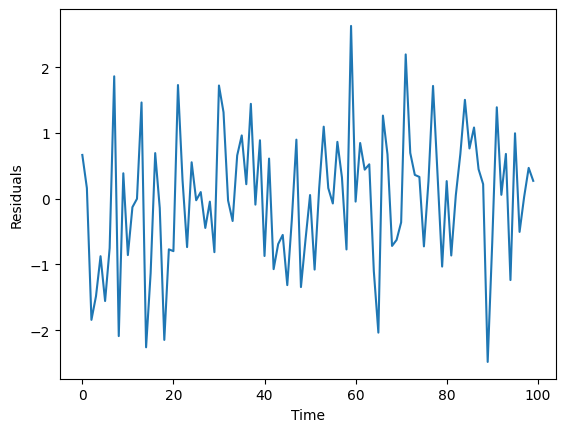

In [10]:
# 잔차 확인
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

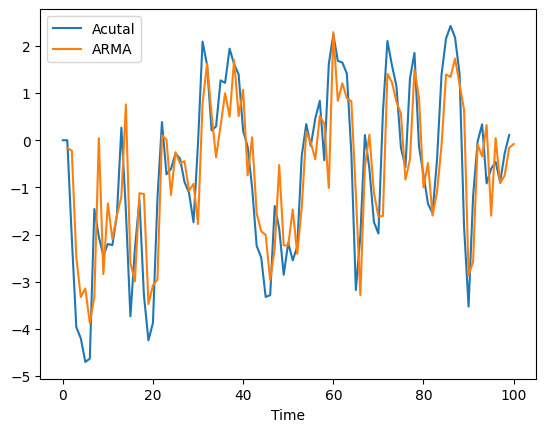

In [11]:
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Acutal')
plt.plot(pred, label='ARMA')
plt.xlabel('Time')
plt.legend()
plt.show()

## ARIMA

In [17]:
# 최적의 p, d, q 차수 찾기

best_aic=np.inf
best_order = None

for p in range(3) :
  for d in range(2) :
    for q in range(3) :
      order = (p,d,q)
      try:
        model = ARIMA(data, order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic :
          best_aic = aic
          best_order = order
      except :
        continue

print("Best AIC : ", best_aic)
print("Best Order : ", best_order )

Best AIC :  291.8601843613247
Best Order :  (1, 0, 2)


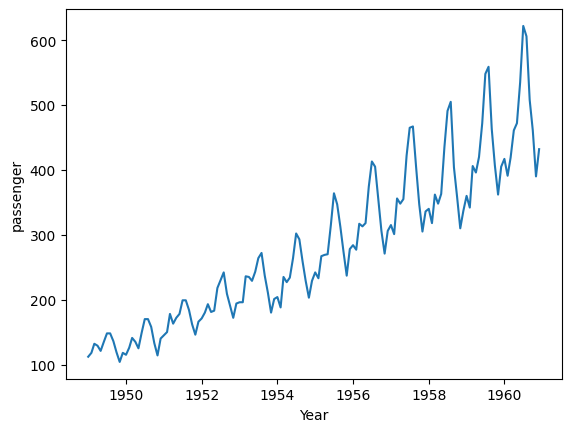

In [24]:
# 실습
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('./airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.plot(data)
plt.xlabel('Year')
plt.ylabel('passenger')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


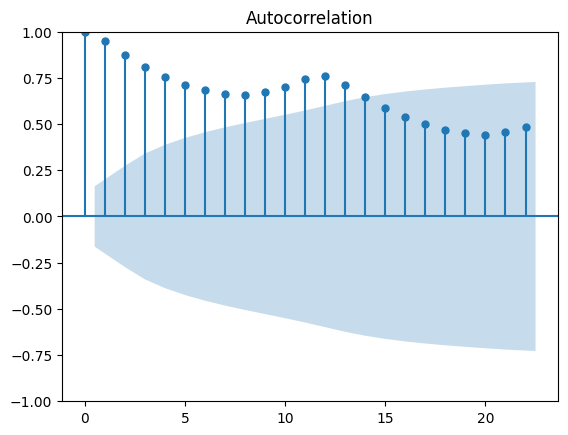

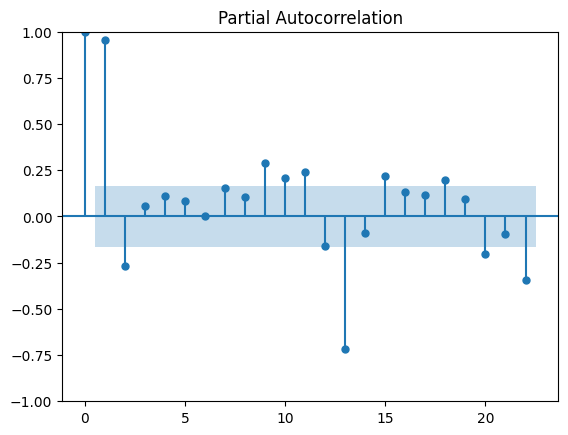

In [28]:
plot_acf(data)
plot_pacf(data)
plt.show()

ADF가 더 작아야 귀무가설 기각 가능.
따라서 귀무가설 기각 불가

In [29]:
result = adfuller(data['Passengers'])
print('ADF Statistic', result[0])
print('p-value', result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}: {value}')

ADF Statistic 0.8153688792060498
p-value 0.991880243437641
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [31]:
model = ARIMA(data, order=(2,1,2))
result = model.fit()

print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 01 Jun 2023   AIC                           1353.347
Time:                        01:32:15   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


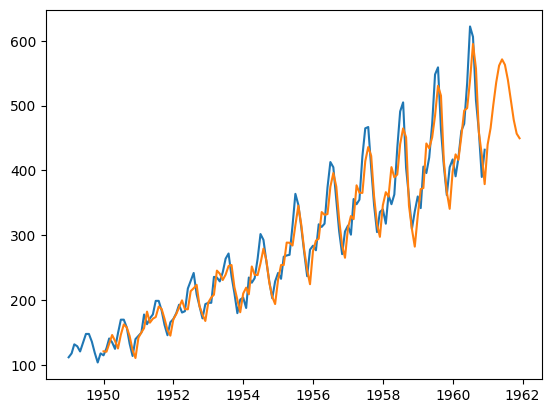

In [36]:
plt.plot(data)
plt.plot(result.predict(start='1950-01-01', end='1961-12-01'))